<a href="https://colab.research.google.com/github/pachterlab/gget_examples/blob/main/gget_alphafold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [gget alphafold](https://github.com/pachterlab/gget) demonstration
Predict the 3D structure of a protein from its amino acid sequence using a simplified version of [DeepMind](https://www.deepmind.com/)’s [AlphaFold v2.3.0](https://github.com/deepmind/alphafold) originally released and benchmarked for [AlphaFold Colab](https://colab.research.google.com/github/deepmind/alphafold/blob/main/notebooks/AlphaFold.ipynb). To increase speed, set "Runtime" -> "Change runtime type" -> "Hardware accelerator" -> "GPU".  
Also see: [ColabFold](https://colab.research.google.com/github/sokrypton/ColabFold/blob/main/AlphaFold2.ipynb).

Written by Laura Luebbert.
___

### Install and import gget

In [ ]:
!pip install -U -q gget
import gget

     |████████████████████████████████| 2.2 MB 36.6 MB/s 
     |████████████████████████████████| 128 kB 85.4 MB/s 
     |████████████████████████████████| 25.2 MB 1.3 MB/s 
     |████████████████████████████████| 1.6 MB 69.2 MB/s 


In [ ]:
#@title Use Miniconda to install OpenMM

#@markdown To install openmm v7.5.1 on your local machine, run: `conda install -qy conda==4.13.0 && conda install -qy -c conda-forge openmm=7.5.1`.  

#@markdown (Recommendation: Follow with `conda update -qy conda` to update conda to the latest version afterwards.)

# For pretty plots
%config InlineBackend.figure_format='retina'

import sys
!rm -rf /opt/conda
!wget -q -P /tmp \
  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh \
    && bash /tmp/Miniconda3-latest-Linux-x86_64.sh -b -p /opt/conda \
    && rm /tmp/Miniconda3-latest-Linux-x86_64.sh

PATH=%env PATH
%env PATH=/opt/conda/bin:{PATH}
!conda install -qy conda==4.13.0 \
    && conda install -qy -c conda-forge \
      python=3.8 \
      openmm=7.5.1

# Add to path
sys.path.append('/opt/conda/lib/python3.8/site-packages')

Install third-part dependencies and download AlphaFold model parameters using `gget setup` (this might take a few minutes):

In [ ]:
gget.setup("alphafold")

######################################################################## 100.0%


### Predict a protein structure

In [ ]:
# Show gget alphafold manual
help(gget.alphafold)

Help on function alphafold in module gget.gget_alphafold:

alphafold(sequence, out='2022_12_30-1803_gget_alphafold_prediction', multimer_for_monomer=False, relax=False, multimer_recycles=3, plot=True, show_sidechains=True)
    Predicts the structure of a protein using a slightly simplified version of AlphaFold v2.3.0 (https://doi.org/10.1038/s41586-021-03819-2)
    published in the AlphaFold Colab notebook (https://colab.research.google.com/github/deepmind/alphafold/blob/main/notebooks/AlphaFold.ipynb).
    
    Args:
      - sequence                Amino acid sequence (str), a list of sequences, or path to a FASTA file.
      - out                     Path to folder to save prediction results in (str).
                                Default: "./[date_time]_gget_alphafold_prediction"
      - multimer_for_monomer    Use multimer model for a monomer (default: False).
      - multimer_recycles       The multimer model will continue recycling until the predictions stop changing, up to the

Predict the 3D structure of CASP14 target [T1024](https://predictioncenter.org/casp14/target.cgi?id=8&view=all):

Using the single-chain model.


Jackhmmer search: 100%|██████████| 199/199 [elapsed: 20:40 remaining: 00:00]



230 unique sequences found in total for sequence 1



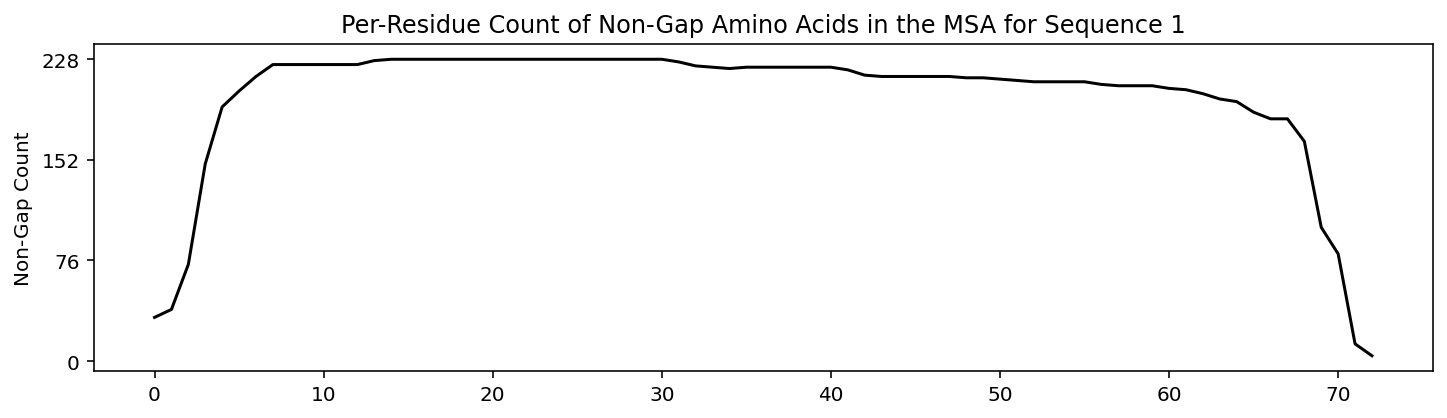

AMBER relaxation: 100%|██████████| 7/7 [elapsed: 11:59 remaining: 00:00]


GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

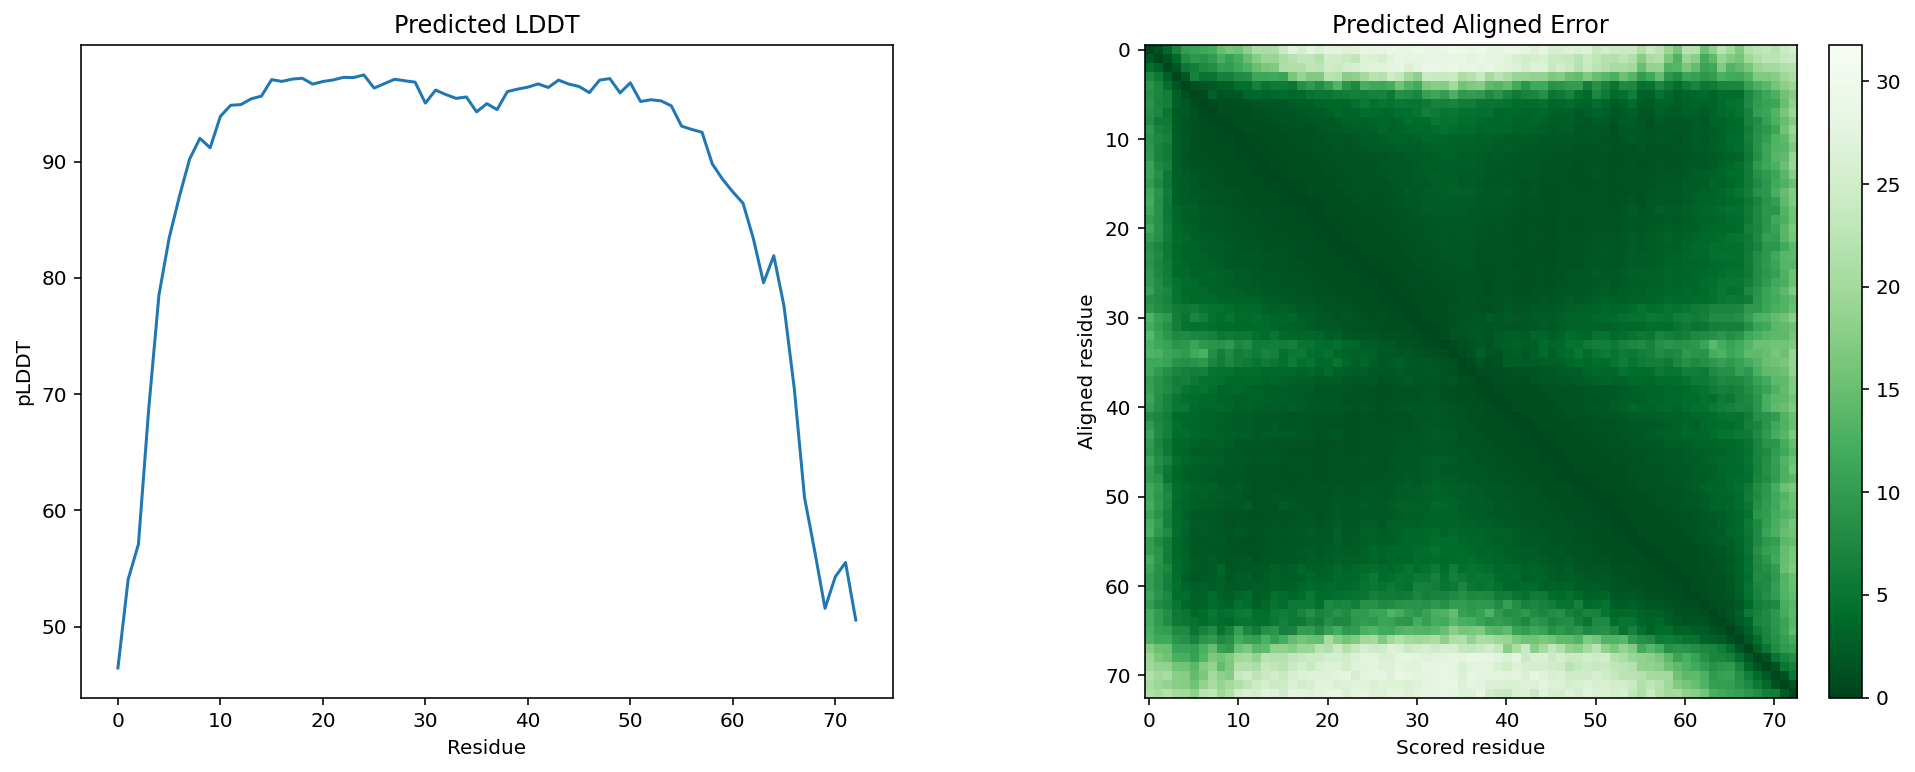

In [ ]:
gget.alphafold("MAAHKGAEHHHKAAEHHEQAAKHHHAAAEHHEKGEHEQAAHHADTAYAHHKHAEEHAAQAAKHDAEHHAPKPH", relax=True)

Predict the 3D structure of an engineered fluorescent nicotine sensor ([PDB 7S7U](https://www.rcsb.org/structure/7S7U)):

Using the single-chain model.


Jackhmmer search: 100%|██████████| 199/199 [elapsed: 23:12 remaining: 00:00]



12043 unique sequences found in total for sequence 1



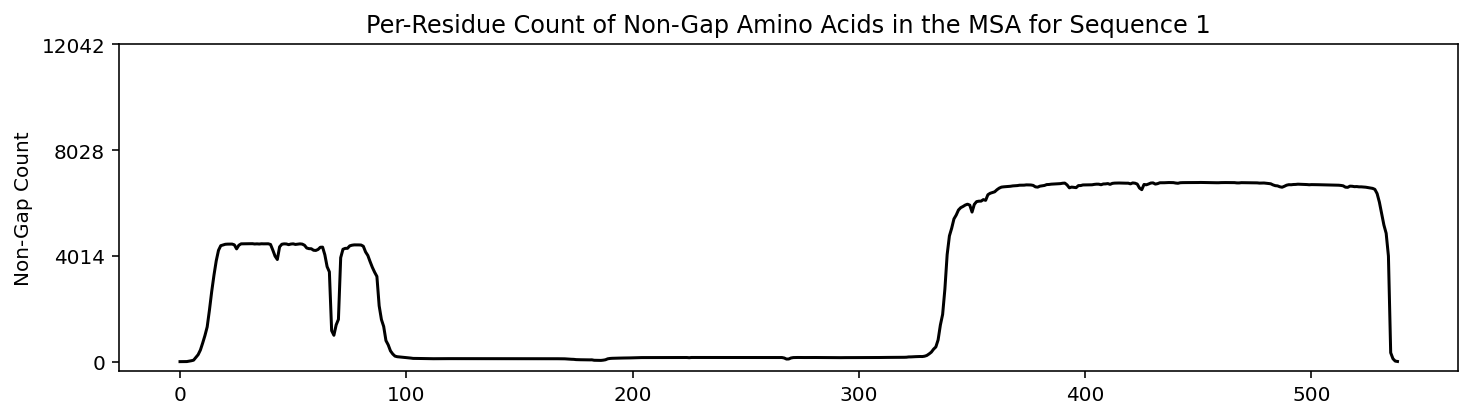

Running model_2_ptm:  86%|████████▌ | 6/7 [elapsed: 16:59 remaining: 02:48]WARNING:root:
Running model without relaxation stage. Use flag [--relax] ('relax=True') to include AMBER relaxation.
Running model_2_ptm: 100%|██████████| 7/7 [elapsed: 17:12 remaining: 00:00]


GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

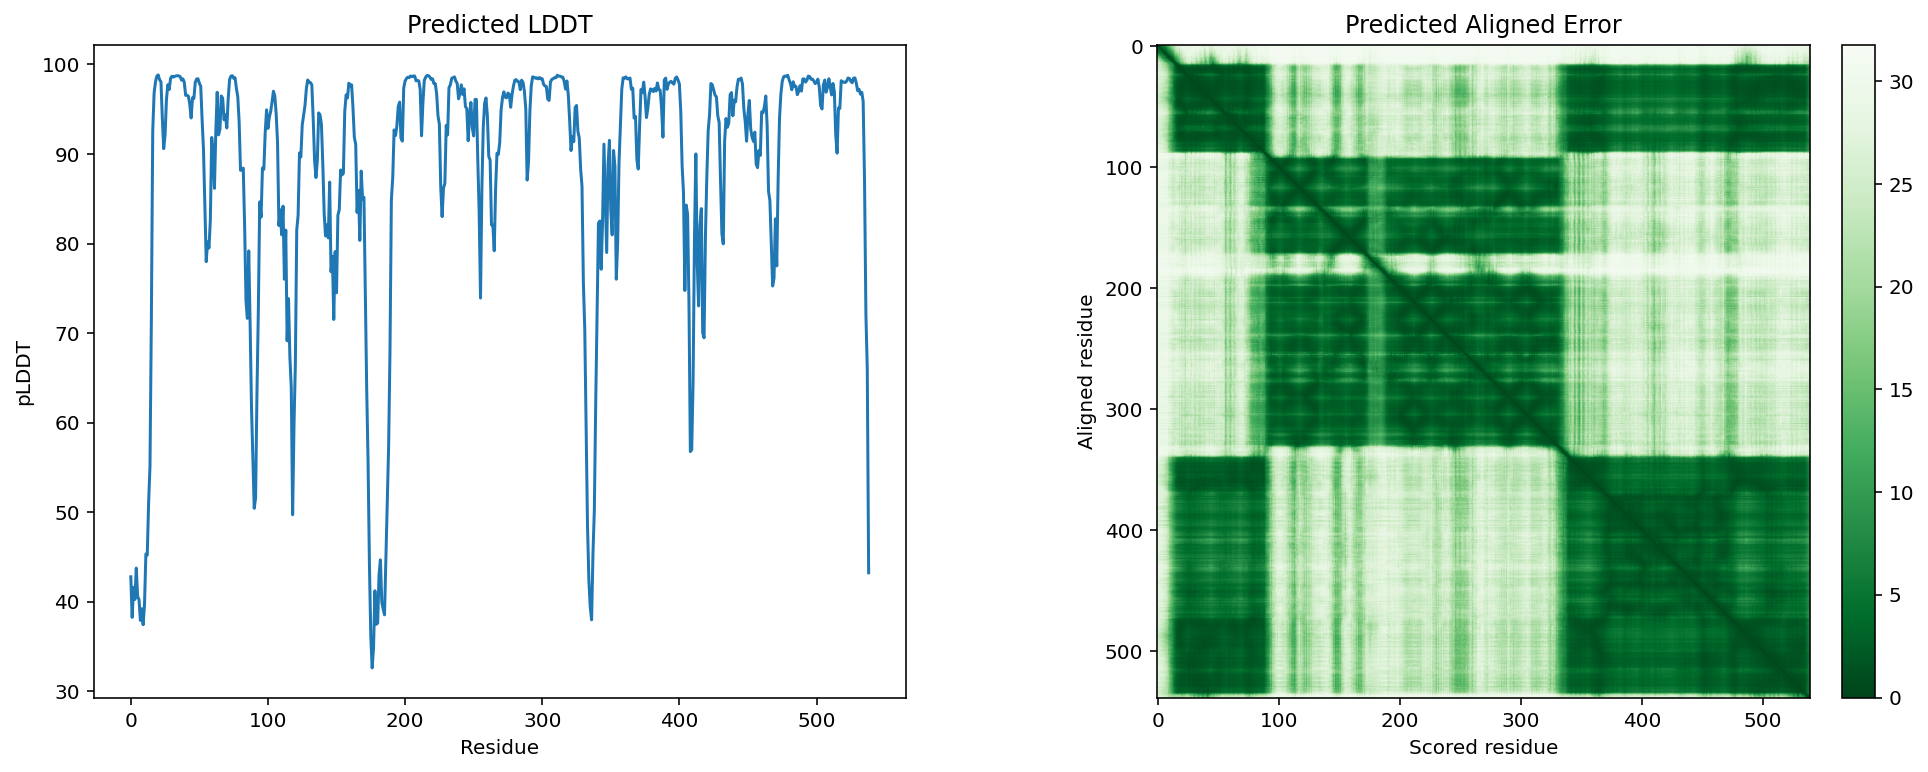

In [ ]:
gget.alphafold(
    "MHHHHHHGAQPARSANDTVVVGSINFTEGIIVANMVAEMIEAHTDLKVVRKLNLGGENVNFEAIKRGGANNGIDIYVEYTGHGLVDILGFPEPNVYITADKQKNGIKANFKIRHNMEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSVLSKDPNEKRDHMVLLEFVTAAGITLGMDELYKGGTGGSMSKGEELFTGVVPILVELDGGVNGHKFSVRGEGEGDATNGKLTLKFICTTGKLPVPWPTLVTTLTYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTISFKDDGTYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNFPPPSSTDPEGAYETVKKEYKRKWNIVWLKPLGFNNTYTLTVKDELAKQYNLKTFSDLAKISDKLILGATMFFLEGPDGYPGLQKLYNFKFKHTKSMDMGIRYTAIDNNEVQVIDAWATDGLLVSHKLKILEDDKAFFPPYYAAPIIRQDVLDKHPELKDVLNKLANQISLEEMQKLNYKVDGEGQDPAKVAKEFLKEKGLILQVD",
    show_sidechains=False
    )

Predict the structure of the nicotine sensor 7S7U as a multimer by passing each element separately in a list of sequences (this takes more time since the MSA needs to be built for each sequence separately):

Jackhmmer search: 100%|██████████| 300/300 [elapsed: 33:37 remaining: 00:00]



2118 unique sequences found in total for sequence 1



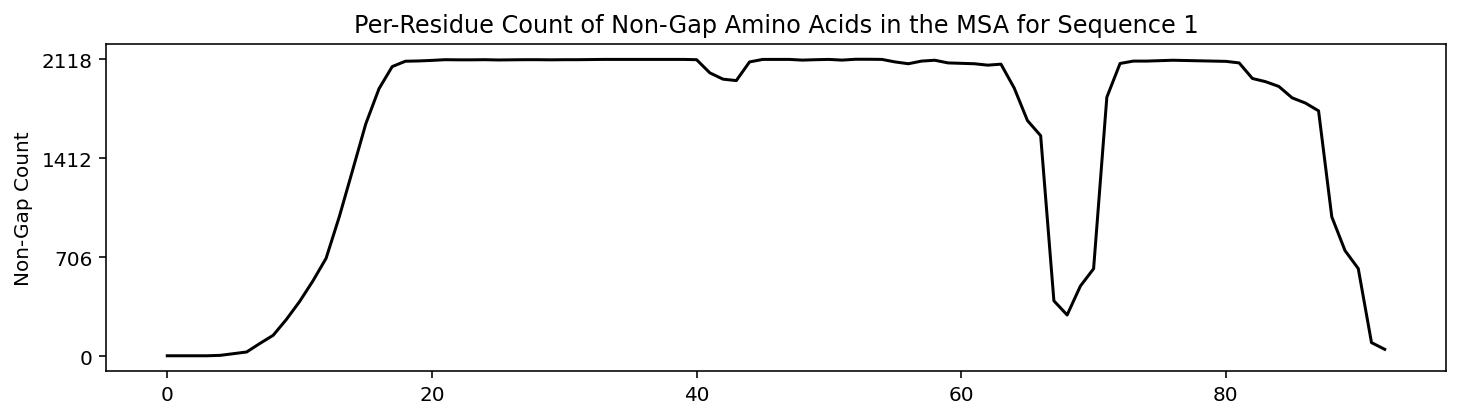

Jackhmmer search: 100%|██████████| 300/300 [elapsed: 34:54 remaining: 00:00]



524 unique sequences found in total for sequence 2



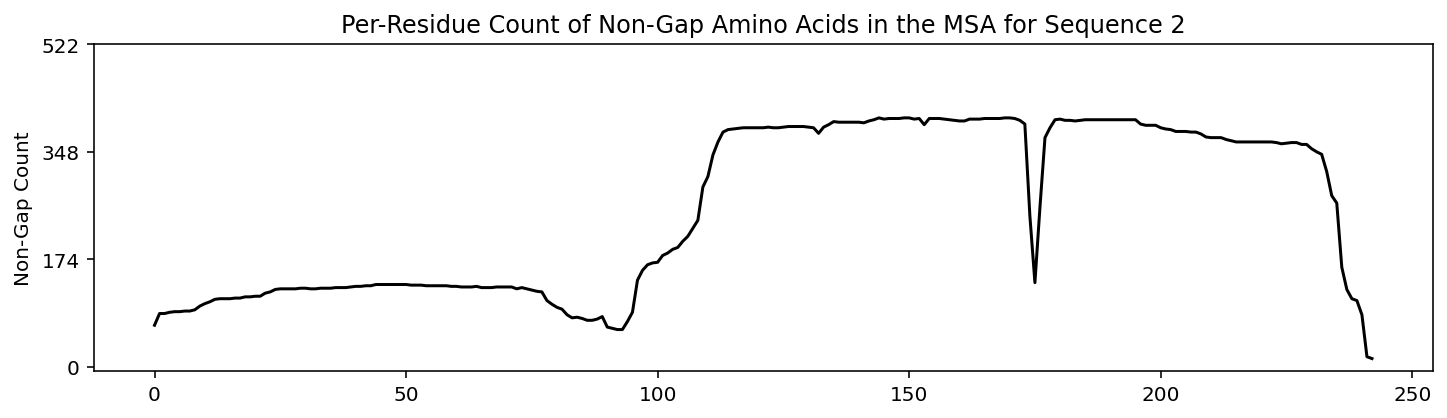

Jackhmmer search: 100%|██████████| 300/300 [elapsed: 34:26 remaining: 00:00]



11411 unique sequences found in total for sequence 3



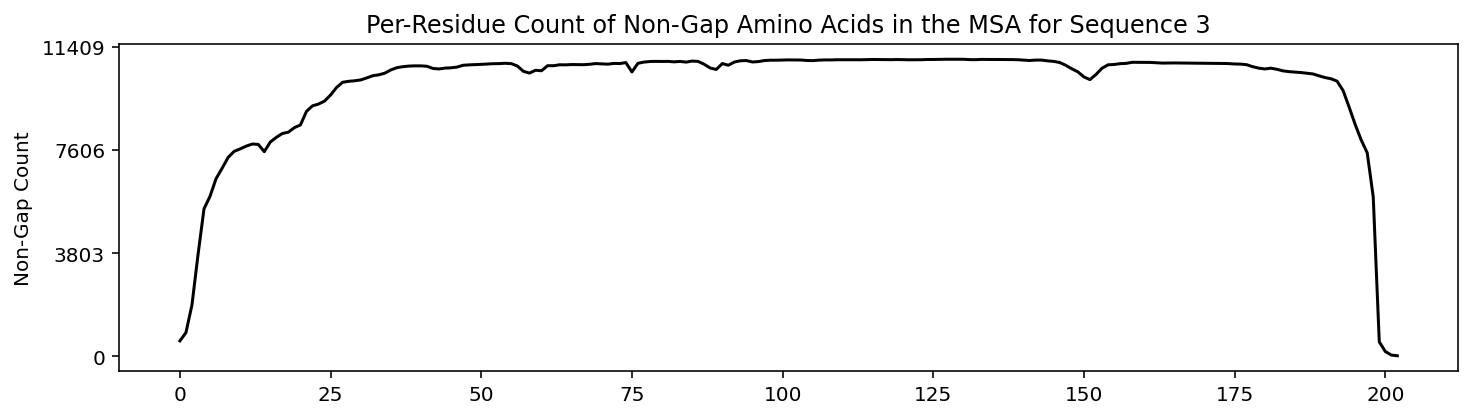

Running model_5_multimer_v3:  83%|████████▎ | 5/6 [elapsed: 13:05 remaining: 02:36]WARNING:root:
Running model without relaxation stage. Use flag [--relax] ('relax=True') to include AMBER relaxation.
Running model_5_multimer_v3: 100%|██████████| 6/6 [elapsed: 13:18 remaining: 00:00]


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

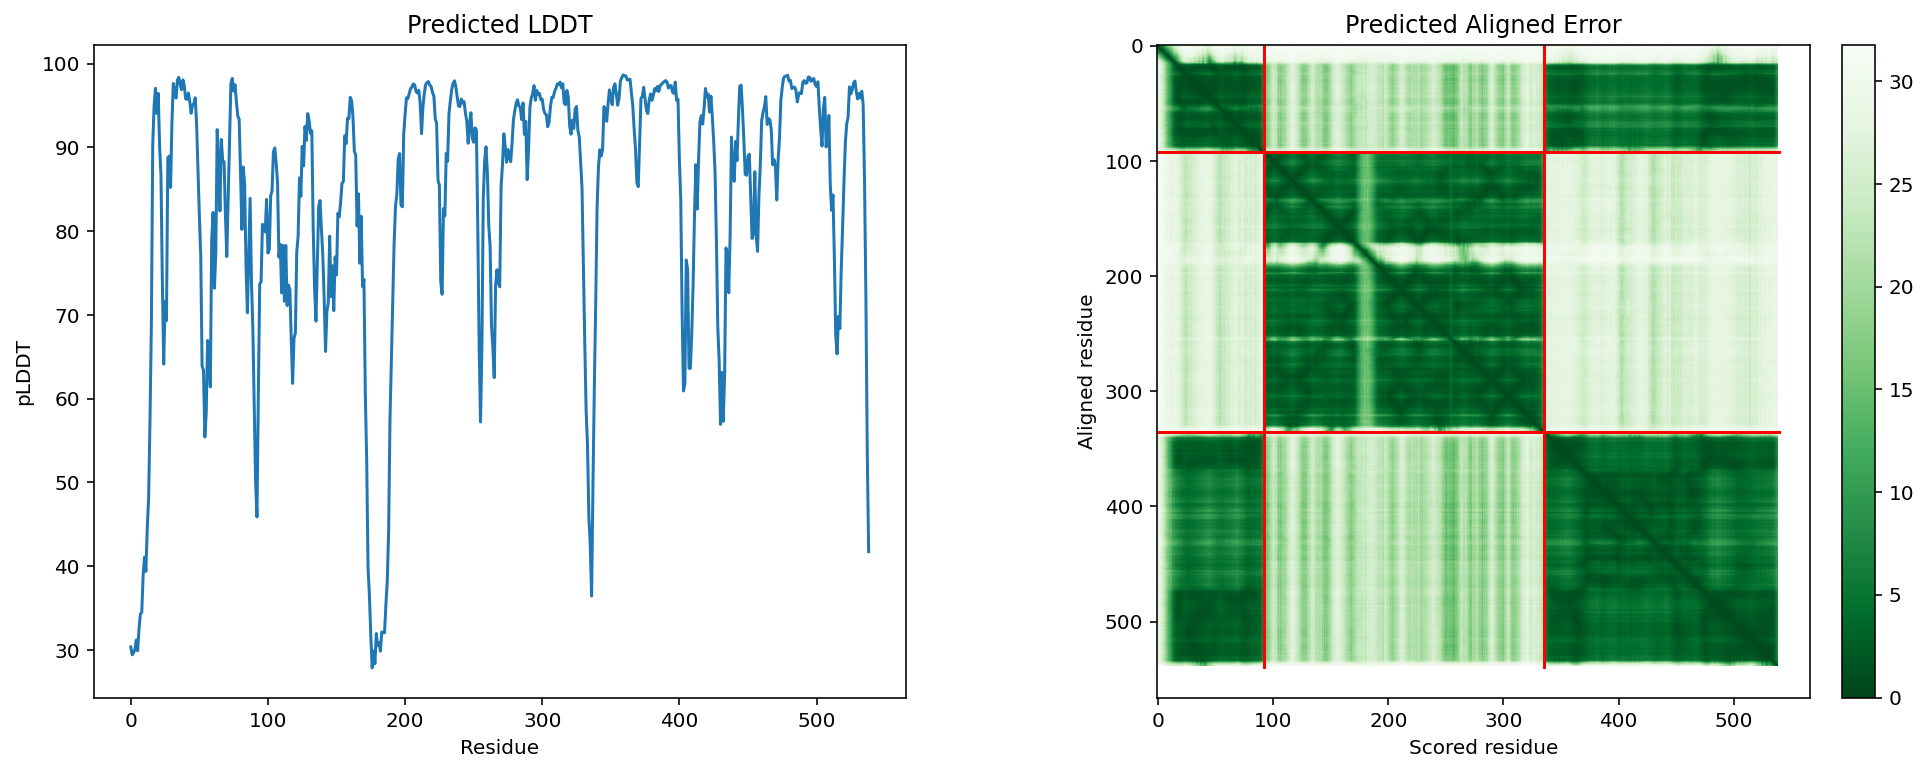

In [ ]:
gget.alphafold(
    [
        "MHHHHHHGAQPARSANDTVVVGSINFTEGIIVANMVAEMIEAHTDLKVVRKLNLGGENVNFEAIKRGGANNGIDIYVEYTGHGLVDILGFPEP",
        "NVYITADKQKNGIKANFKIRHNMEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSVLSKDPNEKRDHMVLLEFVTAAGITLGMDELYKGGTGGSMSKGEELFTGVVPILVELDGGVNGHKFSVRGEGEGDATNGKLTLKFICTTGKLPVPWPTLVTTLTYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTISFKDDGTYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNFPP",
        "PSSTDPEGAYETVKKEYKRKWNIVWLKPLGFNNTYTLTVKDELAKQYNLKTFSDLAKISDKLILGATMFFLEGPDGYPGLQKLYNFKFKHTKSMDMGIRYTAIDNNEVQVIDAWATDGLLVSHKLKILEDDKAFFPPYYAAPIIRQDVLDKHPELKDVLNKLANQISLEEMQKLNYKVDGEGQDPAKVAKEFLKEKGLILQVD"
     ],
    show_sidechains=False
)

In [ ]:
#@title Download the folders created by `gget alphafold`

#@markdown Tip: Especially if you do not have Google Colab Pro, copy-paste this code cell after every prediction to make sure the results are downloaded before they are deleted.

import shutil
import glob
from google.colab import files

for folder in glob.glob("*_gget_alphafold_prediction"):
  # Zip folder
  shutil.make_archive(folder, "zip", folder)

  # Download zipped file
  files.download(f"{folder}.zip")